# Task-1: Restaurant Ratings Analysis

**Objective-1: Analyze the distribution of aggregate ratings and determine the most common rating range.**

**Step-by-Step Process:**

Import required libraries (pandas for data handling).

Load the restaurant dataset into a DataFrame.

Select the Aggregate rating column.

Define rating ranges (bins) to group ratings meaningfully.

Count the number of restaurants in each rating range.

Identify the rating range with the highest frequency (most common range).

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Dataset .csv')

# Define rating ranges (bins)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']

# Create rating range column
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Count restaurants in each range
rating_distribution = df['Rating Range'].value_counts().sort_index()

rating_distribution


Rating Range
0–1    2148
1–2      10
2–3    1891
3–4    4388
4–5    1114
Name: count, dtype: int64

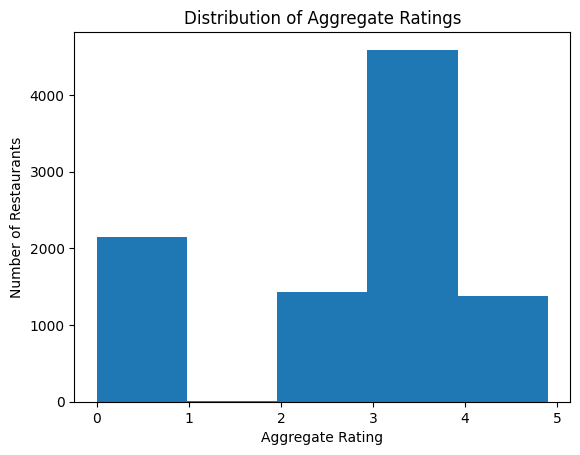

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Dataset .csv')

# Histogram for aggregate ratings
plt.figure()
plt.hist(df['Aggregate rating'], bins=5)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()


**Objective 2: Calculate the average number of votes received by restaurants.**

**Step-by-Step Process:**

Use the already loaded dataset.

Select the Votes column.

Calculate the mean (average) of votes received by restaurants.

Display the calculated average.

In [ ]:
# Calculate average number of votes
average_votes = df['Votes'].mean()

average_votes


np.float64(156.909747670401)

## Task-2: Cuisine Combination Analysis

**Objective 1: Identify the Most Common Cuisine Combinations**



**Step-by-Step Process**





*   Load the dataset into Python using Pandas.

*   Remove missing cuisine values to avoid errors.

*   Split the Cuisines column by comma to convert it into a list of cuisines.

*   Filter restaurants with more than one cuisine (combinations).

*   Standardize combinations by sorting cuisines alphabetically.

*   Create a single combination string (e.g., Chinese + North Indian).

*   Count frequency of each cuisine combination.

*  Sort results in descending order to find the most common combinations.










In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset .csv")

# Remove rows with missing cuisine values
df = df.dropna(subset=['Cuisines'])

# Split cuisines into a list
df['Cuisine_List'] = df['Cuisines'].str.split(', ')

# Filter restaurants with multiple cuisines
combo_df = df[df['Cuisine_List'].apply(lambda x: len(x) > 1)]

# Create standardized cuisine combinations
combo_df['Cuisine_Combination'] = combo_df['Cuisine_List'].apply(
    lambda x: ' + '.join(sorted(x))
)

# Count most common cuisine combinations
common_combinations = combo_df['Cuisine_Combination'].value_counts().head(10)

# Display result
common_combinations


/tmp/ipython-input-2712412297.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_df['Cuisine_Combination'] = combo_df['Cuisine_List'].apply(


Cuisine_Combination
Chinese + North Indian                   616
Mughlai + North Indian                   394
Chinese + Mughlai + North Indian         306
Bakery + Desserts                        181
Chinese + Fast Food                      159
Fast Food + Pizza                        142
Chinese + North Indian + South Indian    135
Mithai + Street Food                     134
Fast Food + North Indian                 120
Bakery + Fast Food                       117
Name: count, dtype: int64

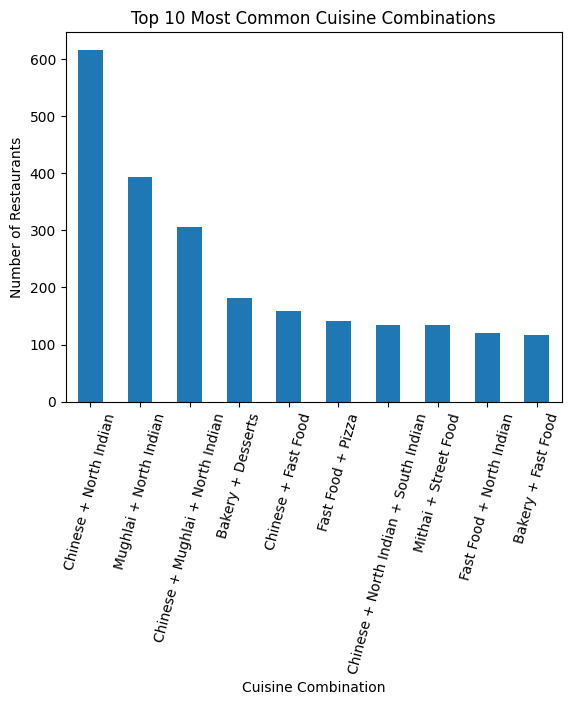

In [ ]:
# Plot bar chart
plt.figure()
top_combinations.plot(kind='bar')
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Cuisine Combination")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=75)
plt.show()


## **Objective 2: Determine if Certain Cuisine Combinations Have Higher Ratings**

 **step-by-step process:**



*   Use the filtered cuisine combination dataset from Objective 1.

*   Group data by cuisine combination.

*   Calculate average aggregate rating for each combination.

*   Sort combinations by rating (descending).

*   Select top-rated cuisine combinations.








In [ ]:
# Calculate average rating for each cuisine combination
combo_ratings = (
    combo_df.groupby('Cuisine_Combination')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Display result
combo_ratings


Cuisine_Combination
BBQ + Breakfast + Southern           4.9
Bar Food + Burger + Steak            4.9
Bakery + Continental + Italian       4.9
American + Coffee and Tea            4.9
American + Healthy Food + Mexican    4.9
Indonesian + Sunda                   4.9
Contemporary + European              4.9
Asian + European + Indian            4.9
Deli + Italian                       4.9
American + Sandwich + Tea            4.9
Name: Aggregate rating, dtype: float64

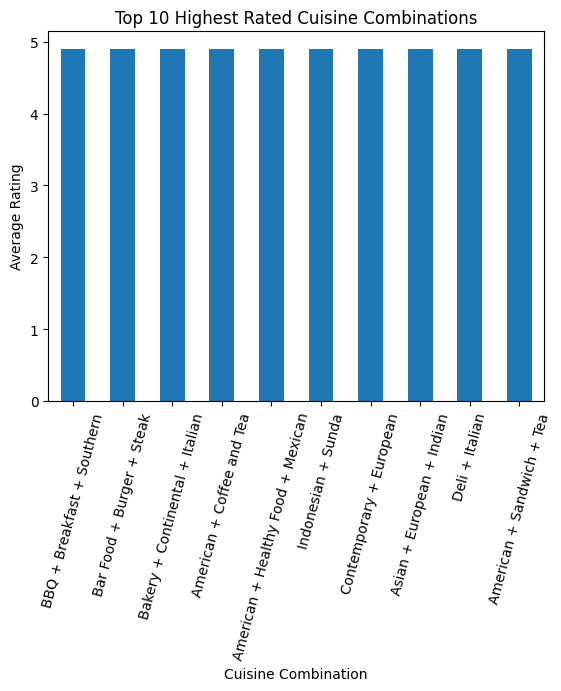

In [ ]:
# Plot bar chart
plt.figure()
avg_ratings.plot(kind='bar')
plt.title("Top 10 Highest Rated Cuisine Combinations")
plt.xlabel("Cuisine Combination")
plt.ylabel("Average Rating")
plt.xticks(rotation=75)
plt.show()


# Task-3: Geographic Analysis

**Objective 1: Plot the Locations of Restaurants on a Map**

**Step-by-Step Execution Process**



*   Load the dataset using Pandas.

*   Remove missing latitude and longitude values to ensure accurate plotting.

*   Extract Latitude and Longitude columns.

*   Use a scatter plot (map-style visualization) to display restaurant locations.

*   Plot longitude on the X-axis and latitude on the Y-axis.








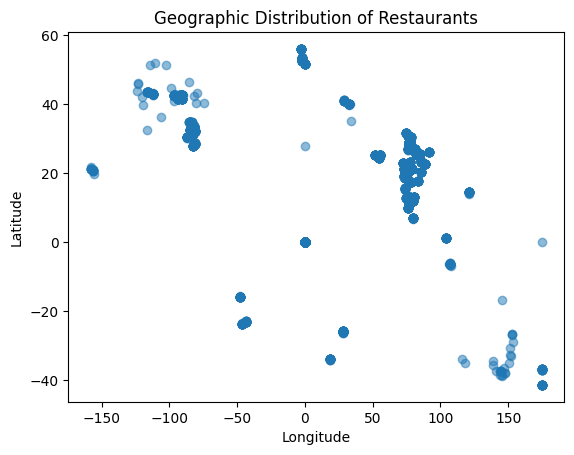

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset .csv")

# Remove rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Plot restaurant locations
plt.figure()
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Objective 2: Identify Patterns or Clusters of Restaurants**

**Step-by-Step  Process:**


Use the same geographic data from Objective 1.

Observe density of points on the map.

Identify clusters where many restaurants are located close together.

Compare dense vs sparse regions.

Relate clusters to urban centers.

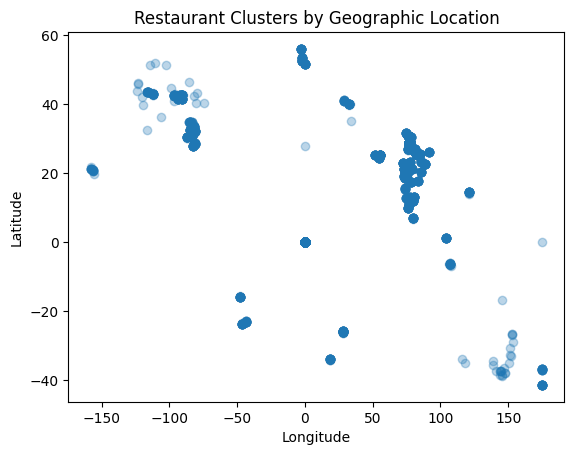

In [ ]:
# Plot clustered view with better visibility
plt.figure()
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
plt.title("Restaurant Clusters by Geographic Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Task-4: Restaurant Chains Analysis

**Objective 1: Identify Restaurant Chains Present in the Dataset**

**Step-by-Step  Process:**

Load the dataset using Pandas.

Group the data by Restaurant Name.

Count how many times each restaurant appears.

Filter restaurants with more than one outlet.

Sort chains by number of outlets.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Dataset .csv")

# Identify restaurant chains
restaurant_chains = (
    df['Restaurant Name']
    .value_counts()
    .reset_index()
)

restaurant_chains.columns = ['Restaurant Name', 'Outlet Count']

# Filter chains with more than one outlet
chains = restaurant_chains[restaurant_chains['Outlet Count'] > 1]

# Display top chains
chains.head(10)


Restaurant Name  Outlet Count
0   Cafe Coffee Day            83
1    Domino's Pizza            79
2            Subway            63
3  Green Chick Chop            51
4        McDonald's            48
5         Keventers            34
6         Pizza Hut            30
7             Giani            29
8    Baskin Robbins            28
9   Barbeque Nation            26

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset .csv")

# Identify restaurant chains
chains = df['Restaurant Name'].value_counts()
chains = chains[chains > 1].index

# Filter chain data
chain_data = df[df['Restaurant Name'].isin(chains)]

# Aggregate ratings and popularity
chain_analysis = chain_data.groupby('Restaurant Name').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum')
).sort_values(by='Total_Votes', ascending=False).head(10)


**Bar Chart 1: Popularity (Total Votes):**

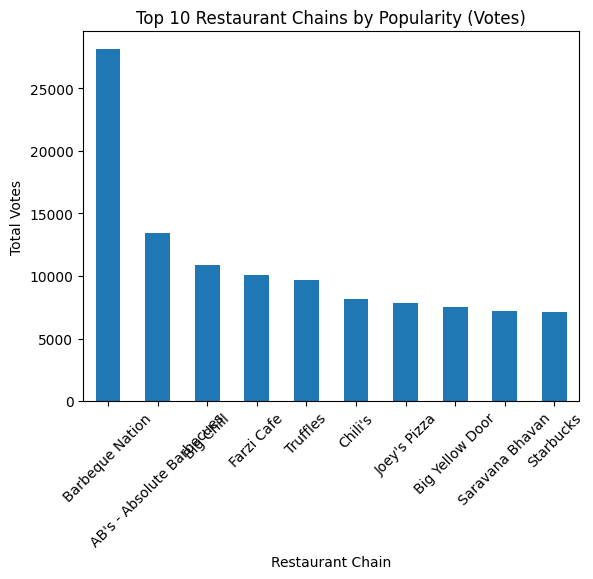

In [ ]:
plt.figure()
chain_analysis['Total_Votes'].plot(kind='bar')
plt.title("Top 10 Restaurant Chains by Popularity (Votes)")
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()


**Bar Chart 2: Average Ratings:**

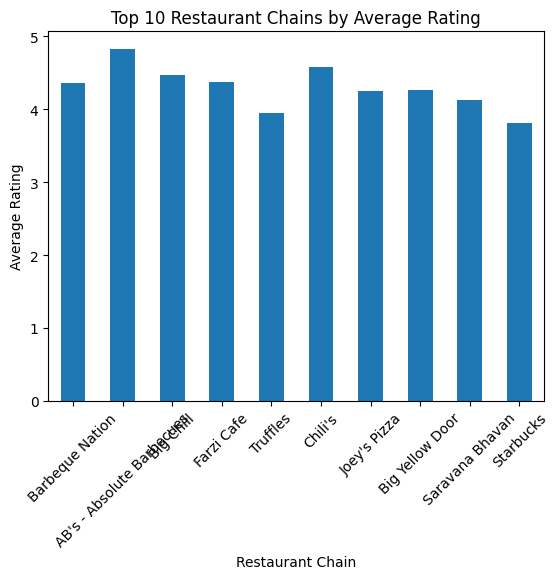

In [ ]:
plt.figure()
chain_analysis['Average_Rating'].plot(kind='bar')
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


**Objective 2: Analyze Ratings and Popularity of Restaurant Chains**

**Step-by-Step Process:**

Filter dataset to include only restaurant chains.

Group data by Restaurant Name.

Calculate:


*   Average Rating
*   Total Votes






Sort chains by ratings and popularity.

Identify high-performing chains.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset .csv")

# Identify restaurant chains (more than one outlet)
restaurant_counts = df['Restaurant Name'].value_counts()
chain_names = restaurant_counts[restaurant_counts > 1].index

# Filter data for restaurant chains only
chain_df = df[df['Restaurant Name'].isin(chain_names)].copy()

# Analyze ratings and popularity
chain_analysis = (
    chain_df
    .groupby('Restaurant Name', as_index=False)
    .agg(
        Average_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum'),
        Outlet_Count=('Restaurant Name', 'count')
    )
)

# Sort by popularity (votes)
chain_analysis = chain_analysis.sort_values(
    by='Total_Votes', ascending=False
)

# Display top 10 restaurant chains
chain_analysis.head(10)


Restaurant Name  Average_Rating  Total_Votes  Outlet_Count
62             Barbeque Nation        4.353846        28142            26
7    AB's - Absolute Barbecues        4.825000        13400             4
79                   Big Chill        4.475000        10853             4
239                 Farzi Cafe        4.366667        10098             6
692                   Truffles        3.950000         9682             2
163                    Chili's        4.580000         8156             5
338               Joey's Pizza        4.250000         7807             2
83             Big Yellow Door        4.266667         7511             3
568            Saravana Bhavan        4.133333         7238             3
614                  Starbucks        3.805556         7139            18